Section B

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


a) Preprocessing and EDA

In [2]:
#Reading the file
file_path = 'processed.cleveland.data'
column_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
#print(len(column_names))
data = pd.read_csv(file_path, header=None, names=column_names)

In [3]:
print(data.head())
#print(len(data))

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  num  
0    3.0  0.0  6.0    0  
1    2.0  3.0  3.0    2  
2    2.0  2.0  7.0    1  
3    3.0  0.0  3.0    0  
4    1.0  0.0  3.0    0  


In [4]:
#Dropping the rows with missing values
df = pd.DataFrame(data)
df.replace("?", pd.NA, inplace=True)

data = data.dropna(axis=0)

In [5]:
print(len(data))

297


In [6]:
#EDA
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope         num  
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000  
mean     0.996633  149.599327    0.326599    1.055556    1.602694    0.946128  
std      0.994914   22.941562 

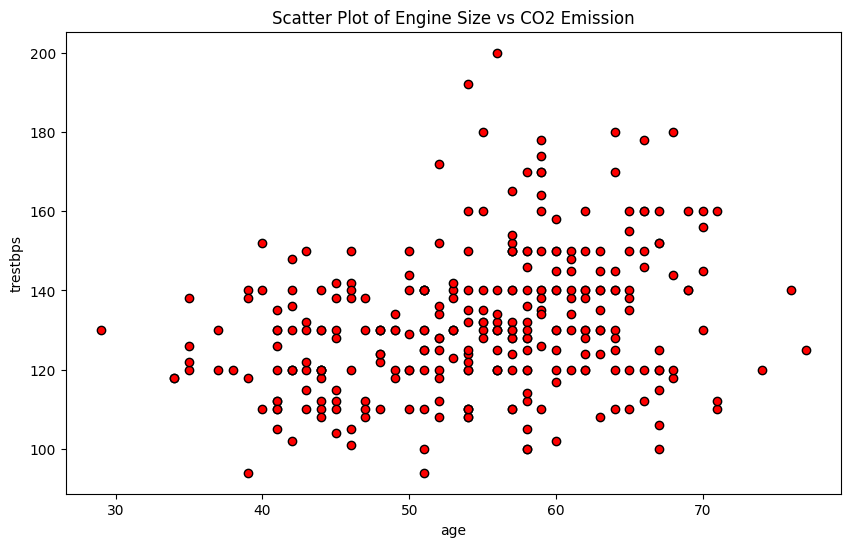

In [7]:
#Scatter plot 
plt.figure(figsize=(10, 6))
plt.scatter(data["age"], data["trestbps"], color='red',edgecolors='black')
plt.title("Scatter Plot of Engine Size vs CO2 Emission")
plt.xlabel("age")
plt.ylabel("trestbps")
plt.show()

/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


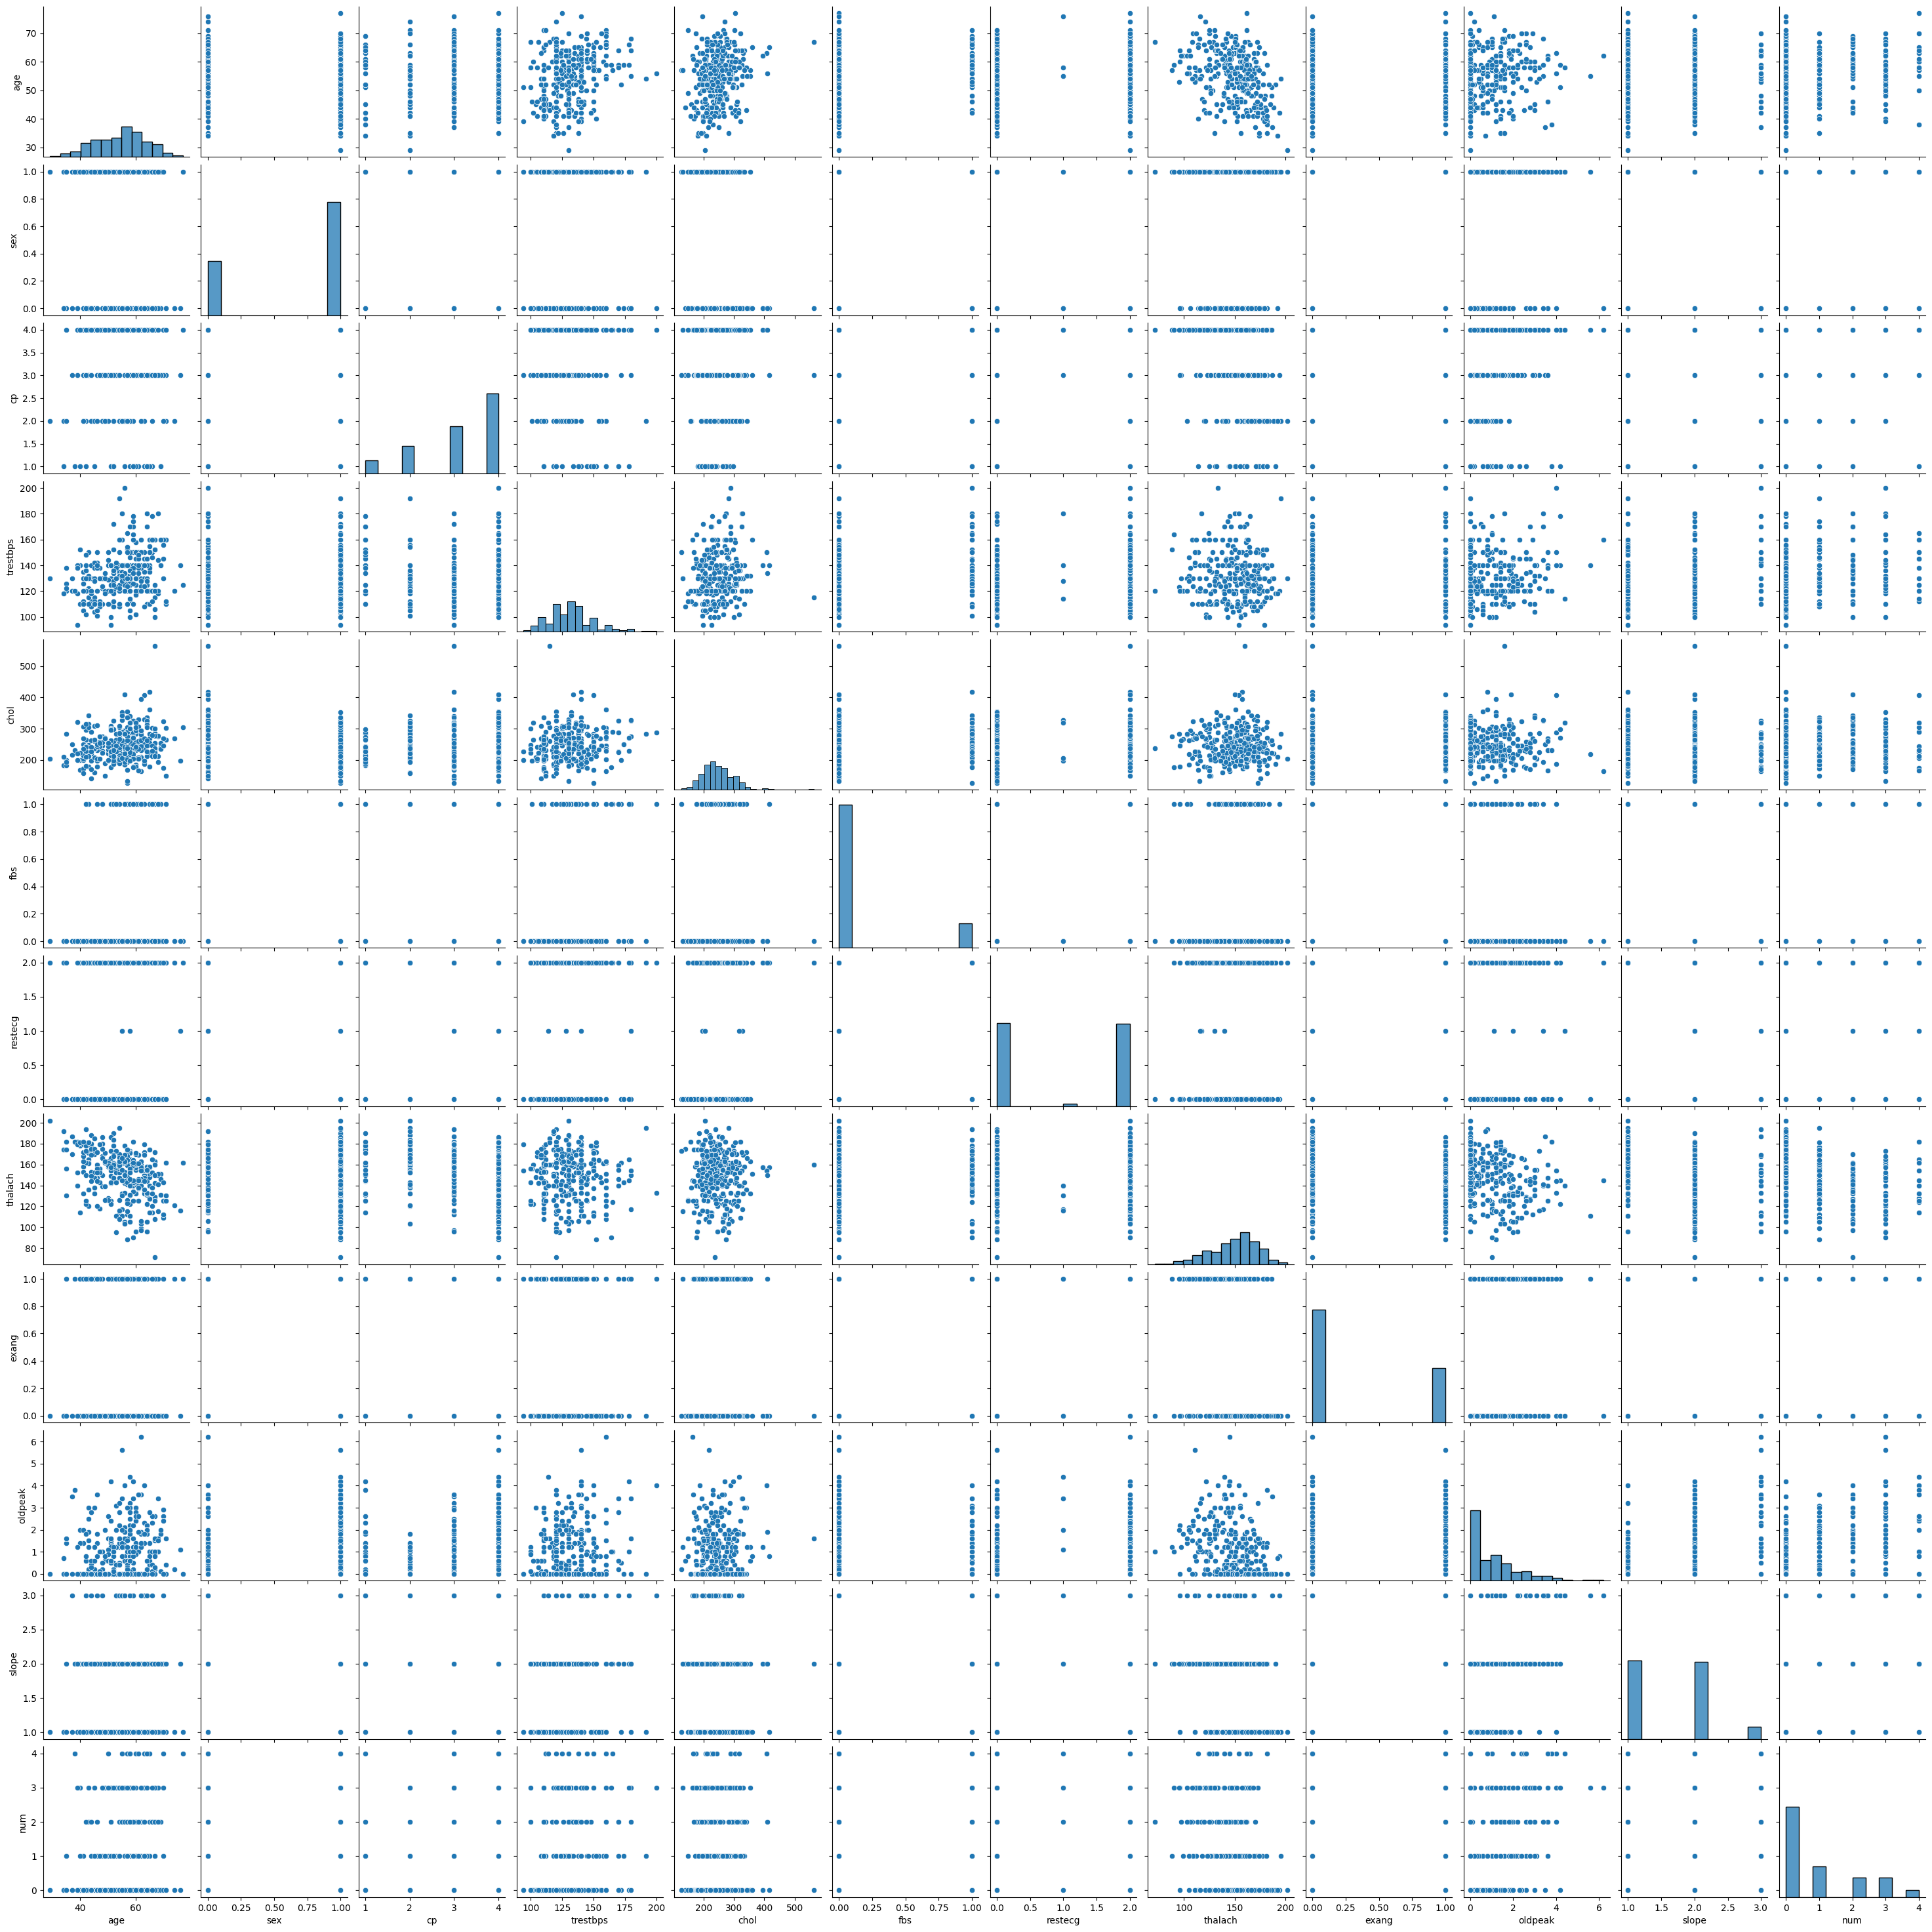

In [8]:
#Pair Plot
sns.pairplot(data)
#plt.title("Pair Plot of all the variables")
plt.show()

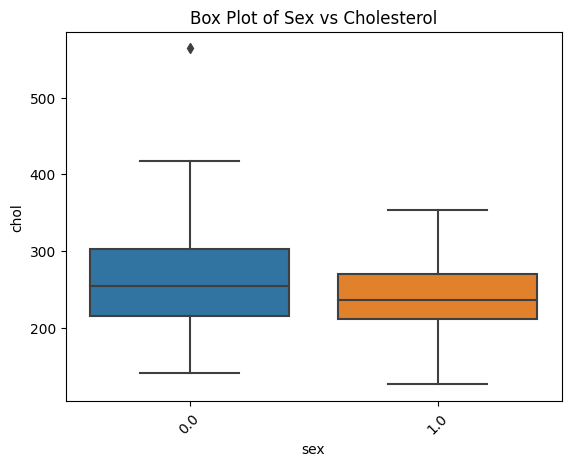

In [9]:
#Boxplot 1
sns.boxplot(x=data["sex"], y=data["chol"])
plt.xlabel("sex")
plt.ylabel("chol")
plt.title("Box Plot of Sex vs Cholesterol")
plt.xticks(rotation=45)
plt.show()

/var/folders/98/56kd2ny5167g4y4k9xsg1jqw0000gn/T/ipykernel_27730/3930419479.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormatrix = data.corr()


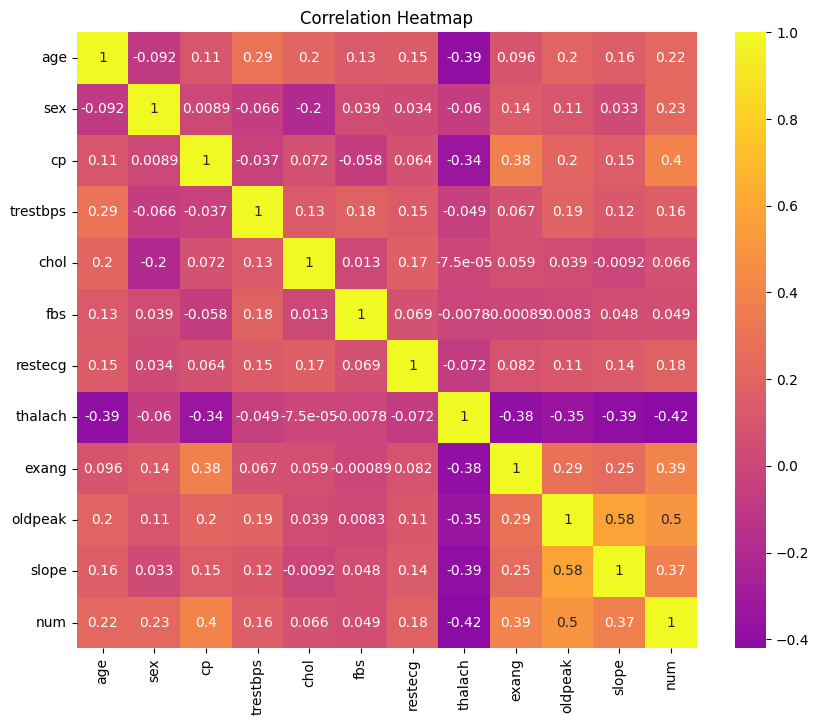

In [10]:
#Correlation Heatmap
cormatrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cormatrix, annot=True, cmap="plasma", center=0)
plt.title("Correlation Heatmap")
plt.show()

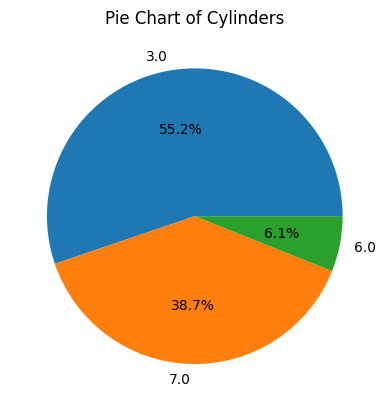

In [11]:
#Pie Chart
counts = data['thal'].value_counts()
l_val = counts.index
plt.pie(counts, labels=l_val, autopct='%1.1f%%')
plt.title("Pie Chart of Cylinders")
plt.show()

b) Splitting the dataset and more pre-processing

In [12]:
reduced = data.copy()
#print(len(reduced))

In [13]:
x = reduced.drop(columns=["num"])
y = reduced["num"]

multi_mapping = {0: 0, 1: 1, 2: 1, 3: 1, 4: 1}
y = y.map(multi_mapping)
#print(y.value_counts())
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=42)

c) Entropy and Gini Impurity

In [14]:
#Entropy criterion
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
entropy_tree.fit(xtrain, ytrain)
ypred_entropy = entropy_tree.predict(xtest)
accuracy_entropy = accuracy_score(ytest, ypred_entropy)

#Gini criterion
gini_tree = DecisionTreeClassifier(criterion='gini', random_state=42)
gini_tree.fit(xtrain, ytrain)
ypred_gini = gini_tree.predict(xtest)
accuracy_gini = accuracy_score(ytest, ypred_gini)

In [15]:
print("Accuracy of Decision Tree with Entropy Criterion: ", accuracy_entropy)
print()
print("Accuracy of Decision Tree with Gini Criterion: ", accuracy_gini)

Accuracy of Decision Tree with Entropy Criterion:  0.7833333333333333

Accuracy of Decision Tree with Gini Criterion:  0.7833333333333333


d) Hyperparameter search through grid search

In [16]:
# Decision tree with Gini criterion
best_criterion = 'gini'
best_classifier = DecisionTreeClassifier(criterion=best_criterion, random_state=42)

#Hyperparameters 
param_grid = {'min_samples_split': [2, 5, 10, 15, 20, 25],'max_features': ['auto', 'sqrt', 'log2', None]}

#GridSearch
grid_search = GridSearchCV(best_classifier, param_grid, cv=5, scoring='accuracy')

#Model Fit
grid_search.fit(xtrain, ytrain)

# Results
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Test the model on the test set and report the accuracy score
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(xtest)
test_accuracy = accuracy_score(ytest, y_pred_best)

/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 637, in _validate_params
    va

In [17]:
print("Best Criteria: ",best_criterion)
print("Best Parameters: ",best_params)
print("Best Score: ",best_score)
print("Test Accuracy of the best Decision Tree Classifier: ", test_accuracy)

Best Criteria:  gini
Best Parameters:  {'max_features': None, 'min_samples_split': 20}
Best Score:  0.7383865248226951
Test Accuracy of the best Decision Tree Classifier:  0.7666666666666667


e) Random Forest Classifier

In [18]:
# Define your hyperparameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],'max_depth': [None, 10, 20, 30],'min_samples_split': [2, 5, 10]  
}

#Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

#GridSearch object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=5)

#Model Fit
grid_search.fit(xtrain, ytrain)

#Best Hyperparameters
best_params = grid_search.best_params_

#Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(xtrain, ytrain)

y_pred_ = best_rf_classifier.predict(xtest)
classification_report = classification_report(ytest, y_pred_)

# Print the best hyperparameters and the classification report
print("Best Hyperparameters:", best_params)
print("Classification Report:")
print(classification_report)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 150}
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.81      0.88      0.84        24

    accuracy                           0.87        60
   macro avg       0.86      0.87      0.86        60
weighted avg       0.87      0.87      0.87        60

